## Logistic regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

### Sources:
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- http://www.data-mania.com/blog/logistic-regression-example-in-python/
- https://onlinecourses.science.psu.edu/stat504/node/149
- https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/

### Data: https://drive.google.com/open?id=0B-dmEvN59Z2ZQWhFekd3ZnRVajA


In [1]:
import pandas as pd

data = pd.read_csv("binClassData.csv")
data.head()

,PRECIPITATION.mm.,X,Y,PL2
0,9.3,-1.097987,1.562858,UH
1,0.1,-2.602452,-0.948759,UH
2,0.0,-3.238200,0.107988,UH
3,0.0,1.807980,1.812404,UH
4,0.0,1.482232,1.473462,UH


In [2]:
data.describe()

,PRECIPITATION.mm.,X,Y
count,1587.000000,1587.000000,1587.000000
mean,3.111483,-0.508142,0.981576
std,6.195972,1.397499,0.879884
min,0.000000,-6.233477,-4.155201
25%,0.000000,-1.372969,0.568808
50%,0.100000,-0.609217,1.164141
75%,3.111483,0.611006,1.554612
max,40.300000,2.847243,3.894491


In [3]:
data['PL2'].describe()

count     1587
unique       2
top         UH
freq      1180
Name: PL2, dtype: object

In [4]:
import seaborn as sns
sns.countplot(data['PL2'])
sns.pairplot(data, hue="PL2", diag_kind="kde")

In [5]:
import numpy as np
data['Class'] = np.where(data['PL2']=="UH", 1, 0)
data.head()

,PRECIPITATION.mm.,X,Y,PL2,Class
0,9.3,-1.097987,1.562858,UH,1
1,0.1,-2.602452,-0.948759,UH,1
2,0.0,-3.238200,0.107988,UH,1
3,0.0,1.807980,1.812404,UH,1
4,0.0,1.482232,1.473462,UH,1


In [6]:
# Vamos a implementar un modelo de aprendizaje automático
# para clasificar los datos en saludable y no saludable 
# a partir de los resultados de un análisis de regresión logística.

# Importamos de la librería sklearn la función 
# train_test_split para construir nuestros conjuntos
# de entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Separamos nuestros datos en atributos
X = data[data.columns[0:3]]

# Y clase (valor continuo PM2.5)
y = data[data.columns[4]]

# random_state: semilla del generador de números aleatorios
# test_size: los datos se han separado en
#   entrenamiento: 80%
#   test: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [7]:
# Importamos el regresor LogisticRegression

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
from sklearn import metrics 
from sklearn.metrics import classification_report

# Vamos a predecir la clase para el conjunto de test
y_pred = LogReg.predict(X_test)

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  60],
       [  8, 223]])

In [9]:
# Reporte de la clasificación
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.31      0.44        87
          1       0.79      0.97      0.87       231

avg / total       0.78      0.79      0.75       318



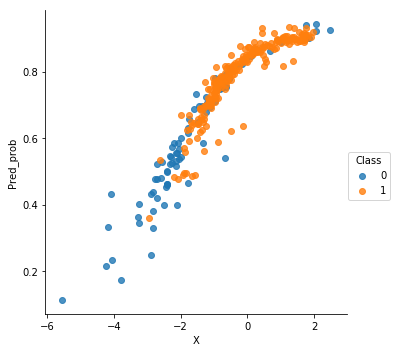

In [10]:
# Probabilidad de predicción
y_prob = LogReg.predict_proba(X_test)
col = np.where(y_pred==1, "green", "red")
pdata = pd.DataFrame()
pdata['X'] = X_test['X']
pdata['Pred_prob'] = y_prob[:,1]
pdata['Pred'] = y_pred
pdata['Class'] = y_test

sns.lmplot(x='X', y='Pred_prob', data=pdata, hue='Class', fit_reg=False)

In [11]:
# Usaremos un umbral de clasificación dado el desbalance 
# de clases P(0) = 0.26, P(1) = 1180/1587 = 0.74

threshold = 1-1180/1587
y_threshold = np.where(y_prob[:,1]>threshold, 1, 0)

cm = confusion_matrix(y_test, y_threshold)
print(cm)
print(classification_report(y_test, y_threshold))

[[  5  82]
 [  0 231]]
             precision    recall  f1-score   support

          0       1.00      0.06      0.11        87
          1       0.74      1.00      0.85       231

avg / total       0.81      0.74      0.65       318

